In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from model import EchoStateNetwork

(0, 1500)

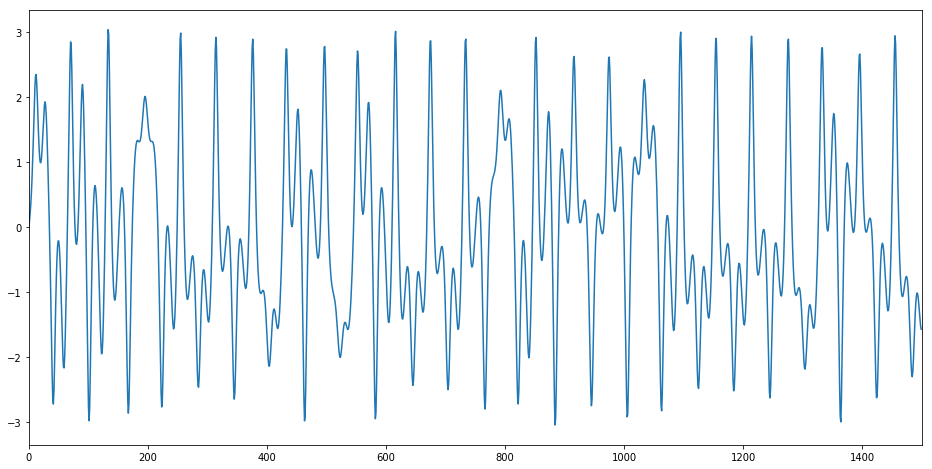

In [2]:
#get Duffing time series data
data = np.loadtxt("DuffingOscillatorData.txt")

plt.figure(figsize=(16,8))
plt.plot(data)
plt.xlim(0, len(data))

In [3]:
#create data
#predict the next l observation from the subsequence of length d
window_size_d = 16
pred_length_l = 1

def create_sliding_window_data(X, window_size, pred_length):
    data = [X[i:i+window_size] for i in range(len(X)-window_size-pred_length)]
    target = [X[i+window_size:i+window_size+pred_length] for i in range(len(X)-window_size-pred_length)]
    return np.array(data), np.array(target)

X_windows, y_windows = create_sliding_window_data(data,window_size_d,pred_length_l)
X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.8,shuffle=False)
X_train = np.expand_dims(X_train,axis=2)
X_test = np.expand_dims(X_test,axis=2)

In [4]:
#Run ESN
with tf.Session() as example_sess:
    ESN = EchoStateNetwork(example_sess, units=32)
    ESN.fit(X_train,y_train)
    y_test_hat = ESN.predict(X_test)

Instructions for updating:
Colocations handled automatically by placer.


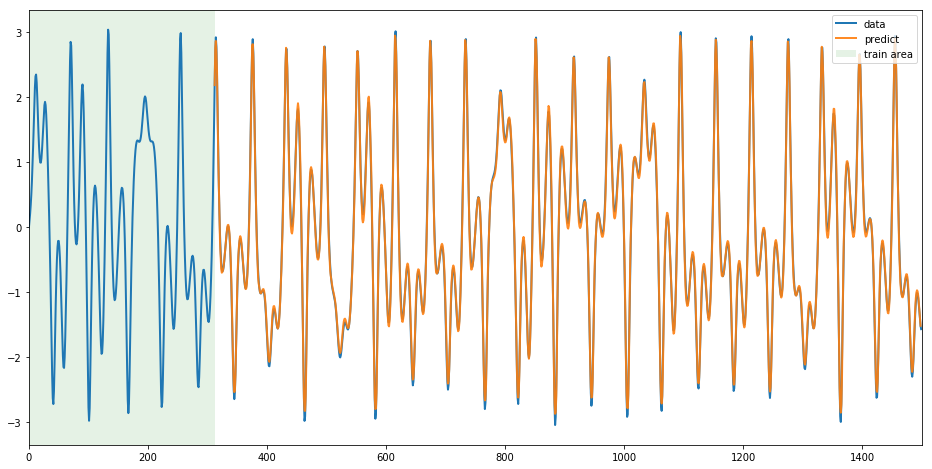

In [5]:
#Result
tr_size = len(X_train)
plt.figure(figsize=(16, 8))
plt.xlim(0, len(data))
plt.plot(data, linewidth = 2, label='data')
plt.plot(range(window_size_d+tr_size, window_size_d+tr_size+len(y_test_hat)), y_test_hat, linewidth = 2, alpha=0.9, label='predict')
plt.axvspan(0, tr_size+window_size_d, facecolor='g', alpha=0.1, label =  "train area")
plt.legend(loc='upper right')